## This is an introductory notebook for using TIGRESS simulation data

First need to import packages: 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
sys.path.pop(1)
sys.path.insert(0,'../')
from matplotlib.colors import LogNorm
import cPickle as pickle

In [4]:
import pyathena as pa

## Unit system

The unit system we choose for this simulation is
* [length] = pc
* [velocity] = km/s
* [density] = 1.4271*m_h/cm^3

In [5]:
# You can retrive the unit system using set_units function.
# To make unit conversion easier, I use astropy's unit and constant.
# You may need to install astropy to use it
# please visit http://www.astropy.org/

unit=pa.set_units(muH=1.4271)
print unit['density'].cgs/1.4271/c.m_p.cgs,unit['velocity'],unit['length']

# other units can be easily obtained
print unit['mass'],unit['time'],unit['magnetic_field']

1.0 1 / cm3 1.0 km / s 1.0 pc
0.0352571473967 solMass 0.977792221673 Myr 0.547685204145 uG


In [6]:
codemass=unit['mass']
codetime=unit['time']
codelength=unit['length']
print codemass,codetime,codelength

0.0352571473967 solMass 0.977792221673 Myr 1.0 pc


## Density projection

The density projection, also known as the surface density, is the integral of density along the z direction:
$\Sigma =\int \rho dz$

Density projections have been calculated and stored to "pickle" files. Please see the following document for more details about pickle. I'm using "cPickle", which is much faster.

https://docs.python.org/3/library/pickle.html

## Data Location

* "2pc" and "4pc" model output can be found in directories "MHD_2pc_S/" and "MHD_4pc/". 
* Surface density data (pickle format) uses an extention ".surf.p"
* Star particle data uses an extention "starpar.vtk"

In [9]:
#this line choses a particular file:
surf_file='/tigress/changgoo/MHD_2pc_S/surf/MHD_2pc_S.0400.surf.p'
#surf_file='MHD_2pc_S/MHD_2pc_S.0421.surf.p'
#this line reads in the binary file to 'surf'
surf=pickle.load(open(surf_file,'rb'))

In [10]:
# "surf" is a dictionary, containing XY domain boundaries and density projection as a numpy array.
print surf['bounds']
# to get data dimensions,
print surf['data'].shape

[-512.  512. -512.  512.]
(512, 512)


In [11]:
# Since we are using a uniform grid, grid resolution is simply given by
Lx=surf['bounds'][1]-surf['bounds'][0]
Ly=surf['bounds'][3]-surf['bounds'][2]
Nx,Ny=surf['data'].shape

# Again, the lengths are in unit of parsec
dx=Lx/Nx
dy=Ly/Ny

In [12]:
# Surface density is already calculated in units of M_sun/pc^2
print surf['data'].mean()

9.08836206506


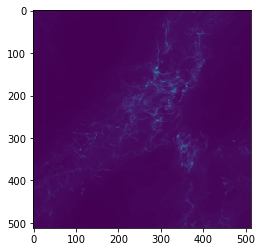

In [13]:
# Let's simply plot it
plt.imshow(surf['data'])

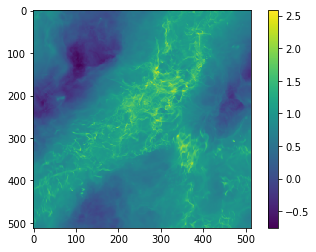

In [14]:
# It may be better to draw in log-scale.
# There are two ways to do it.
# You can take log10 of the data directly,
im=plt.imshow(np.log10(surf['data']))
plt.colorbar(im)

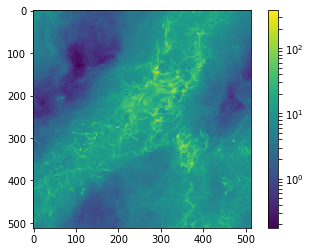

In [15]:
# or you can change the colorbar to log-scale.
# We usually prefer this method.
im=plt.imshow(surf['data'],norm=LogNorm())
plt.colorbar(im)

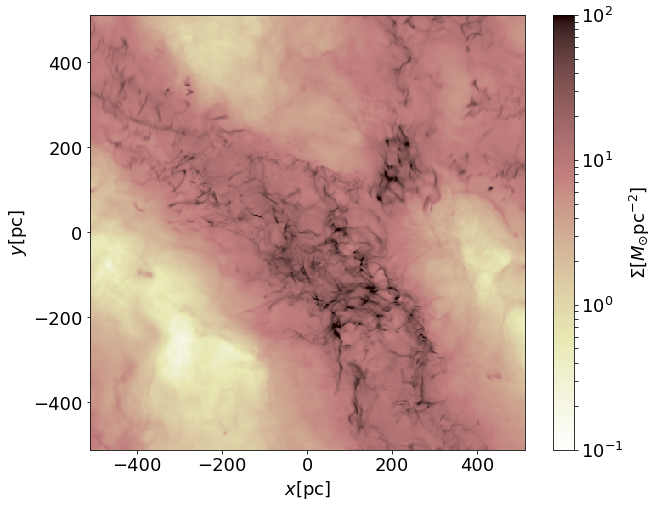

In [16]:
# please see this code to learn how to handle origin, range of the image, and color map

plt.rcParams['font.size']=18
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
im=ax.imshow(surf['data'],norm=LogNorm(),origin='lower')
im.set_clim(1.e-1,1.e2)
im.set_extent(surf['bounds'])
im.set_cmap(plt.cm.pink_r)
ax.set_xlabel(r'$x [{\rm pc}]$')
ax.set_ylabel(r'$y [{\rm pc}]$')
cbar=plt.colorbar(im)
cbar.set_label(r'$\Sigma [M_{\odot} {\rm pc}^{-2}]$')

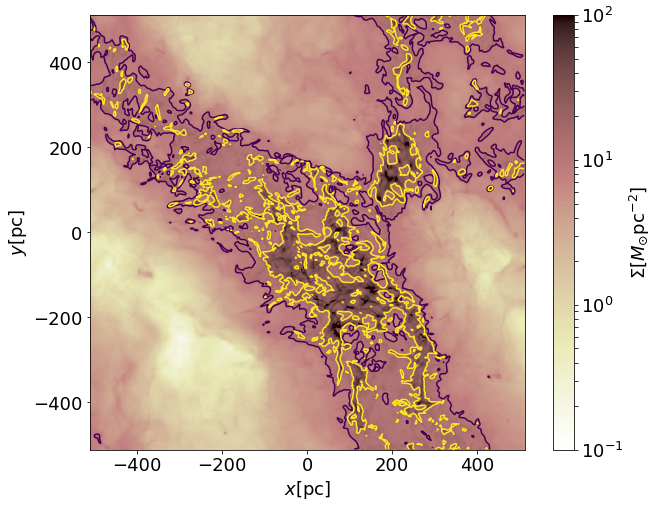

In [17]:
# set cell centered coordinates
x=np.arange(surf['bounds'][0],surf['bounds'][1],dx)+0.5*dx
y=np.arange(surf['bounds'][2],surf['bounds'][3],dy)+0.5*dy
X, Y = np.meshgrid(x,y)

# overplot contour at Surface density of 10 and 20
ct=ax.contour(X,Y,surf['data'],[10,20])
fig

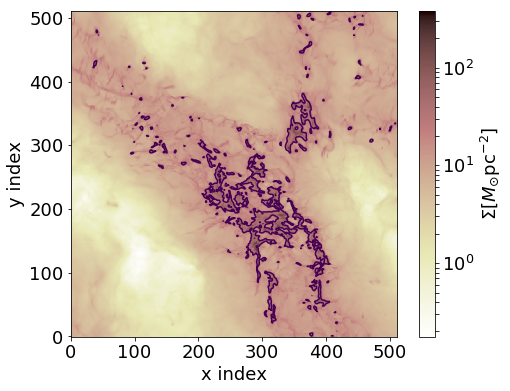

In [18]:
#note that images and contouring can be done using different commands; 
#see e.g. below for another example
#here the image uses the array indices (0 to 511) rather than physical bounds (-512 to 512)
plt.figure(figsize=(8,6))
im.set_clim(1.e-1,5.e2)
plt.imshow(surf['data'],origin='lower',norm=LogNorm(),cmap='pink_r')
plt.xlabel('x index')
plt.ylabel('y index')
cbar=plt.colorbar()
cbar.set_label(r'$\Sigma [M_{\odot} {\rm pc}^{-2}]$')
plt.contour(surf['data'],levels=[30])

## Handling Star Particle Data

In [21]:
# we have star particles, representing star clusters and runaway OB stars
# the star particle information is stored in the *.starpar.vtk files

#note that you must be sure to read the star particle file from the SAME time snapshot as the 
# gas surface density file
sp_file='/tigress/changgoo/MHD_2pc_S/id0/MHD_2pc_S.0400.starpar.vtk'
sp=pa.read_starvtk(sp_file)

In [22]:
# star particle data include age, velocity, position, mass, time, and id
# note that they are all in code units, so proper unit conversion may be needed
sp.keys()

Index([u'age', u'id', u'mass', u'time', u'v1', u'v2', u'v3', u'x1', u'x2',
       u'x3'],
      dtype='object')

In [23]:
#this is the time for the snapshot
print sp['time']*codetime
#these are attributes for star particle #20:
print sp['mass'][20]*codemass, sp['age'][20]*codetime,sp['x1'][20]*codelength,sp['x2'][20]*codelength,

0      390.139194
1      390.139194
2      390.139194
3      390.139194
4      390.139194
5      390.139194
6      390.139194
7      390.139194
8      390.139194
9      390.139194
10     390.139194
11     390.139194
12     390.139194
13     390.139194
14     390.139194
15     390.139194
16     390.139194
17     390.139194
18     390.139194
19     390.139194
20     390.139194
21     390.139194
22     390.139194
23     390.139194
24     390.139194
25     390.139194
26     390.139194
27     390.139194
28     390.139194
29     390.139194
          ...    
402    390.139194
403    390.139194
404    390.139194
405    390.139194
406    390.139194
407    390.139194
408    390.139194
409    390.139194
410    390.139194
411    390.139194
412    390.139194
413    390.139194
414    390.139194
415    390.139194
416    390.139194
417    390.139194
418    390.139194
419    390.139194
420    390.139194
421    390.139194
422    390.139194
423    390.139194
424    390.139194
425    390.139194
426    390

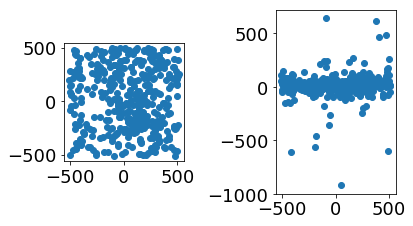

In [24]:
# Let's plot star particles
#these are positions projected onto the horizontal plane:
plt.subplot(121,aspect='equal')
plt.plot(sp['x1'],sp['x2'],'o')
#these are positions projected onto the radial-vertical plane
plt.subplot(122,aspect='equal')
plt.plot(sp['x1'],sp['x3'],'o')
plt.tight_layout()

0.977792221673
432 432
120
49 71


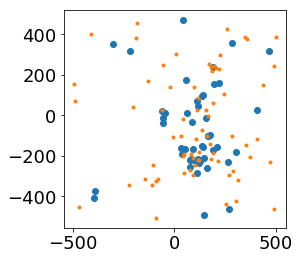

In [27]:
# select young star particles (age < 40Myr)
# first, we need the code unit of time in Myr
tunit_Myr=unit['time'].to('Myr').value
print tunit_Myr
# "young" is a boolean array: True for young, False for old
young=sp['age'] * tunit_Myr < 40.

print len(sp['age']),len(young)
print young.sum()

# second, separate clusters (mass != 0) and runaways (mass == 0)
# mass of runaway OB stars was set to zero
# "runaway" and "cluster" are also boolean arrays
runaway=sp['mass'] == 0
cluster=sp['mass'] != 0

# young * cluster is True for young and cluster particles
young_cluster = young & cluster

print young_cluster.sum(),runaway.sum()

plt.subplot(111,aspect='equal')
plt.plot(sp['x1'][young_cluster],sp['x2'][young_cluster],'o')
plt.plot(sp['x1'][runaway],sp['x2'][runaway],'.')


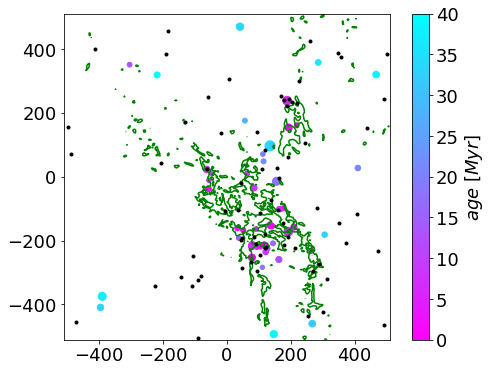

In [28]:
# using scatter plot, we can set size and color cluster particles based on their mass and age, respectively.
# let's convert mass and age in Msun and Myr, respectively.
munit_Msun=unit['mass'].to('Msun').value
mass=sp['mass'][young_cluster]*munit_Msun
age=sp['age'][young_cluster]*tunit_Myr

plt.figure(figsize=(8,6))
ax=plt.subplot(111,aspect='equal')
sc=ax.scatter(sp['x1'][young_cluster],sp['x2'][young_cluster],marker='o',s=mass/50.,c=age,
           vmax=40,vmin=0,cmap=plt.cm.cool_r)
plt.plot(sp['x1'][runaway],sp['x2'][runaway],'.k')
cbar=plt.colorbar(sc)
cbar.set_label(r'$age\ [Myr]$')
# overplot contour at Surface density of 30
ct=ax.contour(X,Y,surf['data'],[30],colors=('green'))
